<a href="https://colab.research.google.com/github/ykitaguchi77/FundusPhoto/blob/main/Crop_to_square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Crop_to_square**
長辺に合わせて正方形に切り取るスクリプト

In [1]:
from PIL import Image
import os
import time
from IPython.display import display
import numpy as np


#google driveをcolabolatoryにマウント
from google.colab import drive
drive.mount('/content/drive')


path = '/content/drive/MyDrive/Deep_learning/FundusPhoto'
os.chdir(path)

Mounted at /content/drive


In [3]:
def convert(in_path, out_path, processing_file):
    #処理時間の計測
    start = time.time()

    l=0
    for i in processing_file:      
          img = Image.open(in_path + '/' + i)

          #元画像を表示
          #plt.imshow(np.asarray(img))
          #plt.show()

          img_new = crop2square(img)
          img_new.save(out_path +'/'+ i)
          print(out_path +'/'+ i)
          
          #切り取った画像を表示
          #plt.imshow(np.asarray(img_new))
          #plt.show()

    print('Process done!!')
    elapsed_time = time.time() - start
    print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

def crop2square(pil_img):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = pil_img.crop(((width-height)//2, 0, (width+height)//2, height))
        return result
    else:
        result = pil_img.crop((0, (height-width)//2, width, (height+width)//2))
        return result

def showInfo(in_path):
    #処理するDirectoryの設定
    file = os.listdir(in_path)
    print(len(file))

    #ここにフォルダ番号を記載する (ex. [0:999])
    processing_file = file[0:len(file)]
    #processing_file = file[0:1]
    print(processing_file)
    len(processing_file)
    return processing_file

In [4]:
path = '/content/drive/MyDrive/Deep_learning/FundusPhoto'
os.chdir(path)


#元画像フォルダ
in_path = path + '/img_train'

#保存先フォルダ
out_path = path + '/cropped_img'
if not os.path.exists(out_path):
    os.makedirs(out_path)

processing_file = showInfo(in_path)
convert(in_path, out_path, processing_file)

1414
['img21443464_02_1R.jpg', 'img41578668_06_1R.jpg', 'img23514161_09_1R.jpg', 'img26516043_01_1R.jpg', 'img07349977_04_1R.jpg', 'img56381211_06_2L.jpg', 'img62657370_10_2L.jpg', 'img41168264_00_2L.jpg', 'img43473225_05_1R.jpg', 'img41589846_01_1R.jpg', 'img75859552_01_2R.jpg', 'img42053837_04_1R.jpg', 'img17225916_00_1R.jpg', 'img76888512_00_1R.jpg', 'img53994905_10_3L.jpg', 'img41268862_02_2L.jpg', 'img50844685_03_1R.jpg', 'img34865533_05_1R.jpg', 'img35047283_11_2L.jpg', 'img29187515_01_2L.jpg', 'img30672827_02_1R.jpg', 'img18347006_11_2L.jpg', 'img65805852_00_2L.jpg', 'img54712384_03_1R.jpg', 'img54489928_11_1R.jpg', 'img22355647_00_1R.jpg', 'img10638445_03_2L.jpg', 'img23647691_02_1R.jpg', 'img26927560_04_1R.jpg', 'img70868525_01_1R.jpg', 'img65805852_00_1R.jpg', 'img46990447_07_1R.jpg', 'img27582884_00_1R.jpg', 'img52922738_05_1R.jpg', 'img03136594_00_2L.jpg', 'img04599923_00_2L.jpg', 'img61482209_00_1R.jpg', 'img67159836_02_1R.jpg', 'img01802741_00_1R.jpg', 'img76843122_11_1R.

#**ファイル数の確認と画像表示**

In [5]:
def countfile(path):

    # フォルダ内の全ファイル名をリスト化
    files = os.listdir(path)
    
    # リストの長さ（ファイル数）を取得
    count = len(files)
    
    # ファイル数を確認
    print(count)


def showfile(path, num):
    files = os.listdir(path)
    imgPIL = Image.open(path+"/"+files[num])  # 画像読み込み
    display(imgPIL)


1414
1414


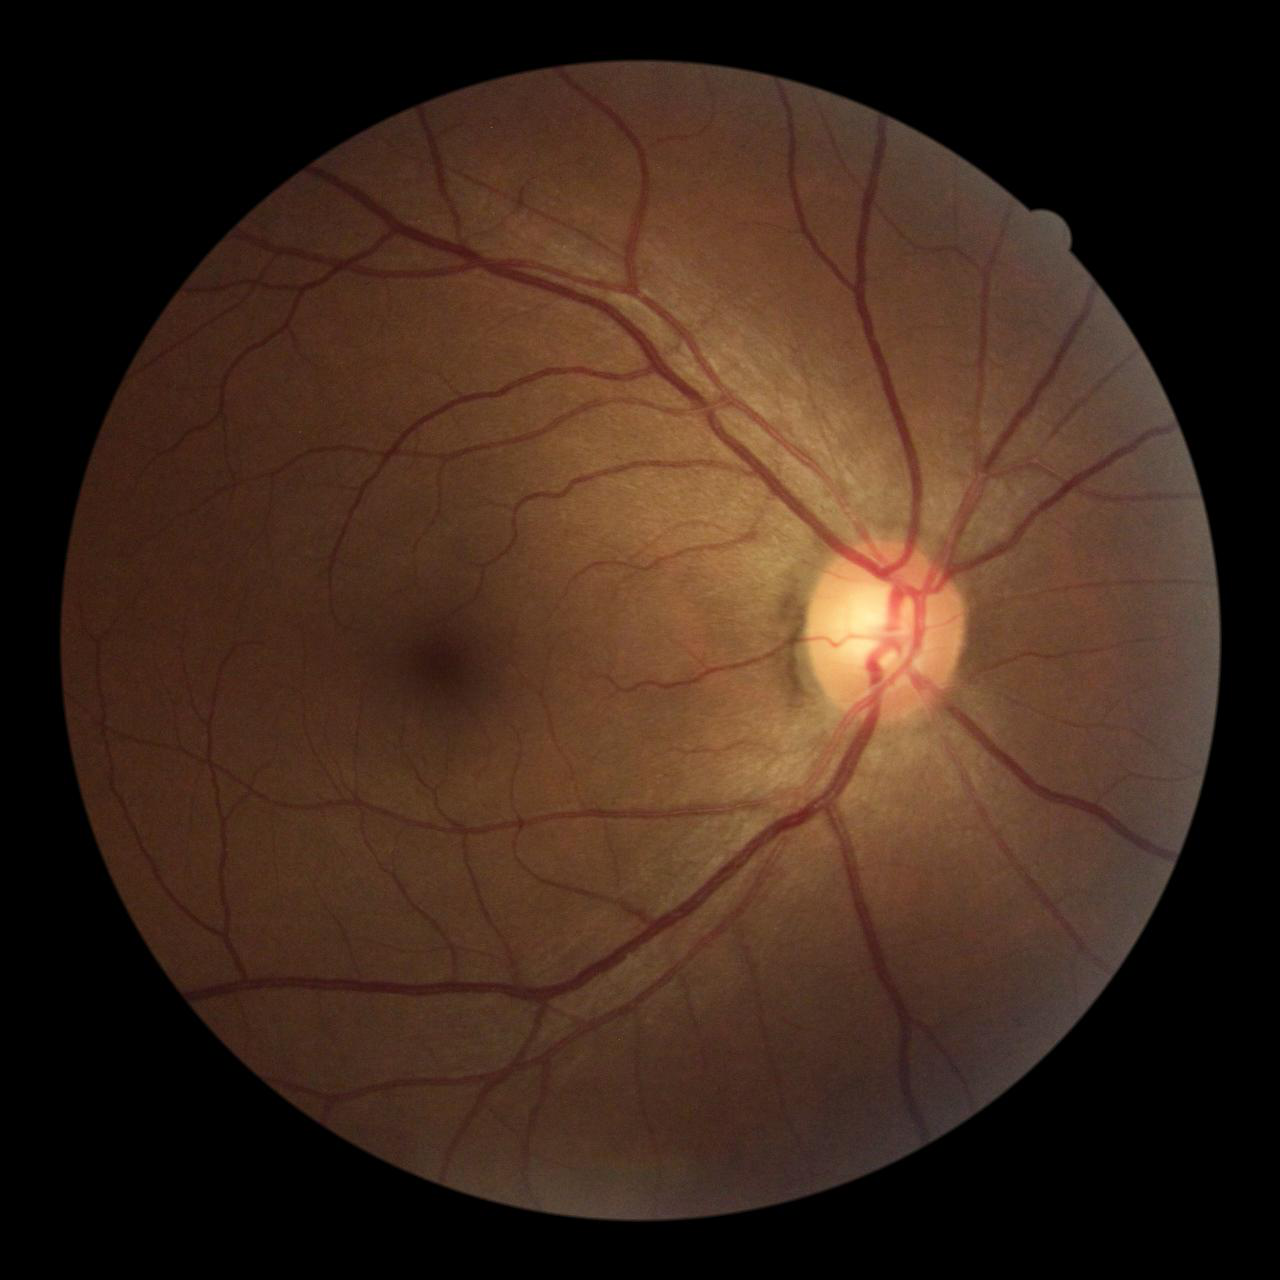

In [7]:
countfile(path +"/img_train")
countfile(path +"/cropped_img")
showfile(path +"/cropped_img/", 3)

#**フォルダの削除**

In [ ]:
import shutil

directory = 'ここにパスをコピペ'

try:
    shutil.rmtree(directory)
except FileNotFoundError:
    pass